In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir("/content/drive/My Drive/Capstone_Collab/")

In [0]:
ls

Eatery_Starter.ipynb  EDA/  in_data/  out_data/


In [0]:
import pandas as pd
rt = pd.read_csv('./in_data/Eatery_TrainingData.csv')

In [0]:
df=rt.copy()

In [0]:
df.head(5)

,id,average_cost_for_two,book_url,cuisines,currency,establishment_types__establishment_type__id,establishment_types__establishment_type__name,featured_image,has_online_delivery,has_table_booking,include_bogo_offers,is_book_form_web_view,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__address,location__city,location__city_id,location__country_id,location__latitude,location__locality,location__locality_verbose,location__longitude,location__zipcode,medio_provider,mezzo_provider,name,offers,opentable_support,price_range,switch_to_order_menu,thumb,user_rating__aggregate_rating,user_rating__custom_rating_text,user_rating__custom_rating_text_background,user_rating__rating_text,user_rating__rating_tool_tip,user_rating__votes,zomato_events
0,18888,60,NaN,"Pizza, Kiwi",NZ$,7,Bar,https://b.zmtcdn.com/data/res_imagery/7100254_...,0,0,True,0.0,0,0,0.0,"55 Cleveland Street, Brooklyn, Wellington City",Wellington City,71,148,-41.305333,Brooklyn,"Brooklyn, Wellington City",174.763500,NaN,NaN,OTHER,Brooklyn Bar & Bistro,[],0.0,3,0,https://b.zmtcdn.com/data/res_imagery/7100254_...,3.7,NaN,NaN,Good,NaN,26,NaN
1,14145,240,NaN,American,R,16,Casual Dining,https://b.zmtcdn.com/data/res_imagery/6402311_...,0,0,True,NaN,0,0,NaN,"303 Main Road, Sea Point, Cape Town",Cape Town,64,189,-33.912079,Sea Point,"Sea Point, Cape Town",18.393100,NaN,NaN,NaN,Franky's Diner,[],NaN,3,0,https://b.zmtcdn.com/data/res_imagery/6402311_...,3.6,NaN,NaN,Good,NaN,214,NaN
2,28502,475,NaN,Italian,MYR,18,Fine Dining,NaN,0,0,True,0.0,0,0,0.0,"Level Eleven, Le Meridien, 2, Jalan Stesen Sen...",Kuala Lumpur,88,123,3.135924,Le Meridien,"Le Meridien, Kuala Lumpur",101.686354,50470.0,NaN,OTHER,Favola - Le Meridien,[],0.0,4,0,NaN,3.8,NaN,NaN,Good,NaN,13,NaN
3,23643,15,NaN,"Petiscos, Finger Food, Beverages",€,4,Kiosk,https://b.zmtcdn.com/data/reviews_photos/9bc/b...,0,0,True,0.0,0,0,0.0,"Praça Duque de Saldanha, Saldanha, Lisboa",Lisboa,82,164,38.733511,Saldanha,"Saldanha, Lisboa",-9.143674,NaN,NaN,OTHER,DejaVu Plaza,[],0.0,2,0,https://b.zmtcdn.com/data/reviews_photos/9bc/b...,3.7,NaN,NaN,Good,NaN,17,NaN
4,12767,300,NaN,Healthy Food,P,4,Kiosk,https://b.zmtcdn.com/data/reviews_photos/a7b/0...,0,0,True,0.0,0,0,0.0,"Third Floor, Main Mall, SM Mall of Asia, Mall ...",Pasay City,63,162,14.535570,"Main Mall, SM Mall of Asia, Mall of Asia Compl...","Main Mall, SM Mall of Asia, Mall of Asia Compl...",120.981812,NaN,NaN,OTHER,Tossed,[],0.0,1,0,https://b.zmtcdn.com/data/reviews_photos/a7b/0...,3.4,NaN,NaN,Average,NaN,14,NaN


In [0]:

import pandas_profiling as pp

pp.ProfileReport(df)

Number of variables,39
Number of observations,24026
Total Missing (%),19.0%
Total size in memory,7.0 MiB
Average record size in memory,305.0 B
Numeric,11
Categorical,19
Boolean,7
Date,0
Text (Unique),0
Rejected,2


In [0]:
df.describe()

,id,average_cost_for_two,establishment_types__establishment_type__id,has_online_delivery,has_table_booking,is_book_form_web_view,is_delivering_now,is_table_reservation_supported,is_zomato_book_res,location__city_id,location__country_id,location__latitude,location__longitude,medio_provider,opentable_support,price_range,switch_to_order_menu,user_rating__aggregate_rating,user_rating__votes
count,24026.000000,2.402600e+04,24026.000000,24026.000000,24026.000000,24004.0,24026.000000,24026.000000,24004.000000,24026.000000,24026.000000,24026.000000,24026.000000,418.0,24004.0,24026.000000,24026.0,24026.000000,24026.000000
mean,16060.682885,1.123696e+04,25.345501,0.122451,0.022226,0.0,0.087655,0.027345,0.005874,94.563931,126.845168,14.025617,40.929221,1.0,0.0,2.464372,0.0,3.082357,98.533089
std,9209.286727,7.048641e+04,49.483151,0.327812,0.147421,0.0,0.282798,0.163091,0.076418,545.494480,78.441268,30.411370,64.095444,0.0,0.0,1.039771,0.0,1.478613,211.481835
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,32.000000,1.000000,-43.623872,-123.108080,1.0,0.0,1.000000,0.0,0.000000,0.000000
25%,8116.250000,3.500000e+01,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,58.000000,37.000000,-12.992547,-2.247167,1.0,0.0,2.000000,0.0,3.000000,4.000000
50%,16067.500000,9.000000e+01,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,67.000000,148.000000,24.431988,35.525165,1.0,0.0,2.000000,0.0,3.600000,24.000000
75%,23958.750000,4.000000e+02,23.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,82.000000,208.000000,39.898147,79.838045,1.0,0.0,3.000000,0.0,4.000000,96.000000
max,31979.000000,3.500000e+06,292.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,11080.000000,215.000000,73.990002,175.662804,1.0,0.0,4.000000,0.0,4.900000,5376.000000


In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

Skewness: -1.384297


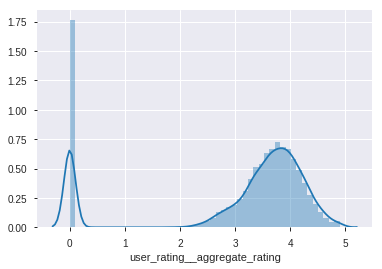

In [0]:
sns.distplot(df['user_rating__aggregate_rating'])
#skewness
print("Skewness: %f" % df['user_rating__aggregate_rating'].skew())

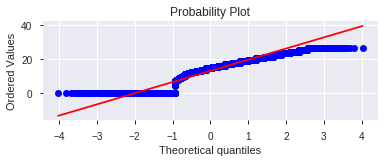

In [0]:
fig=plt.figure()
ax2 = fig.add_subplot(211)
xt, _ = stats.boxcox(df['user_rating__aggregate_rating']+1)
prob = stats.probplot(xt, dist=stats.norm,plot=ax2)
plt.show()

In [0]:
df_mean=df.groupby("location__city_id").mean()


### Removing rows which has zero entries more than 40% of total entries
### Replacing zeros with mean group by city id


In [0]:
#Getting percentage of zeros

df_zeros=df.groupby("location__city_id")['user_rating__aggregate_rating'].apply(lambda x: (x.value_counts().get(0,0))/x.count()*100)

In [0]:
#Selecting records with less than 40% of zeros

df_zero=df_zeros[df_zeros.values<=40]

In [0]:
ind=df_zero.index

In [0]:
df=df[df["location__city_id"].isin (ind)] 

In [0]:
# Replacing zeros with mean group by city_id

df['user_rating__aggregate_rating'] = df.groupby("location__city_id")['user_rating__aggregate_rating'].apply(lambda x: x.replace(0,x.mean()))

### By doing all these Skewness decreased from -1.4 to -0.3 

Skewness: -0.315412


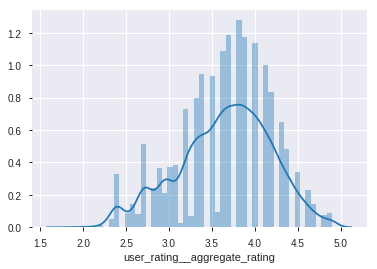

In [0]:
sns.distplot(df['user_rating__aggregate_rating'])
#skewness
print("Skewness: %f" % df['user_rating__aggregate_rating'].skew())

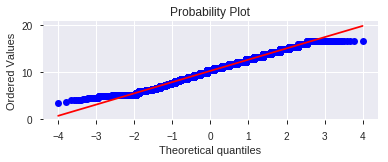

In [0]:
fig=plt.figure()
ax2 = fig.add_subplot(211)
xt, _ = stats.boxcox(df['user_rating__aggregate_rating']+1)
prob = stats.probplot(xt, dist=stats.norm,plot=ax2)
plt.show()

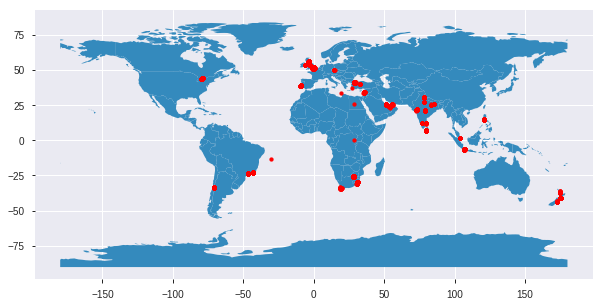

In [0]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['location__longitude'], df['location__latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

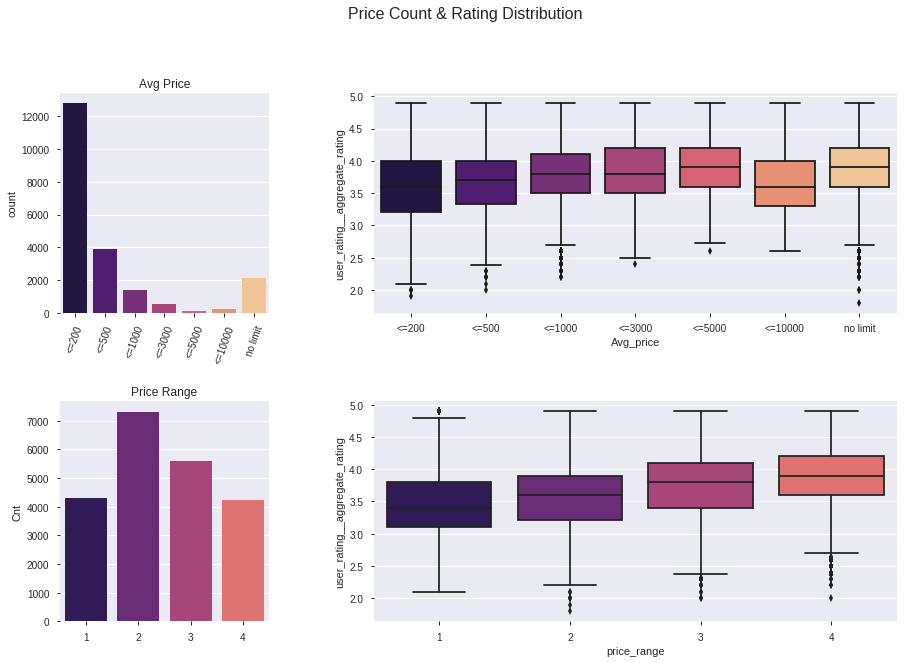

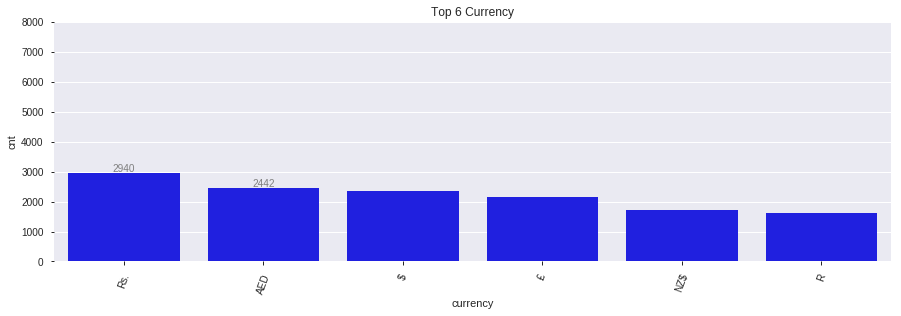

In [0]:
f = plt.figure(figsize = (15,15))
df['Avg_price'] = pd.cut(df['average_cost_for_two'], bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000], labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no limit'])
ax = plt.subplot2grid((3,3), (0,0))
sns.countplot(df['Avg_price'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Avg Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((3,3), (0,1), colspan = 3)
sns.boxplot(x = 'Avg_price', y = 'user_rating__aggregate_rating', data = df, ax = ax, palette = sns.color_palette('magma', 7))

cnt = df['price_range'].value_counts().reset_index()
cnt.columns = ['price_range', 'Cnt']
ax = plt.subplot2grid((3,3), (1,0))
sns.barplot(x = 'price_range', y = 'Cnt', data = cnt, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((3,3), (1,1), colspan = 3)
sns.boxplot(x='price_range', y ='user_rating__aggregate_rating', data = df, ax = ax, palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.5, hspace = 0.4, top = 0.9)
plt.suptitle('Price Count & Rating Distribution', size = 16)
plt.show()
f = plt.figure(figsize = (15,15))
ax = plt.subplot2grid((3,3),(2,0),colspan=3)
cnt = df['currency'].value_counts().reset_index()
cnt.rename(columns = {'index':'currency', 'currency':'cnt'}, inplace = True)
sns.barplot(x = 'currency', y = 'cnt', data =cnt.head(6), color = 'b', ax = ax)
ax.set_title('Top 6 Currency', size = 12)
ax.tick_params(axis='x', rotation=70)
ax.set_ylim([0, 8000])
for i, val in enumerate(cnt['cnt'].head(2)):
  ax.text(i, val+50, val, color = 'grey', ha = 'center')
sns.despine(left=True, bottom=True)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


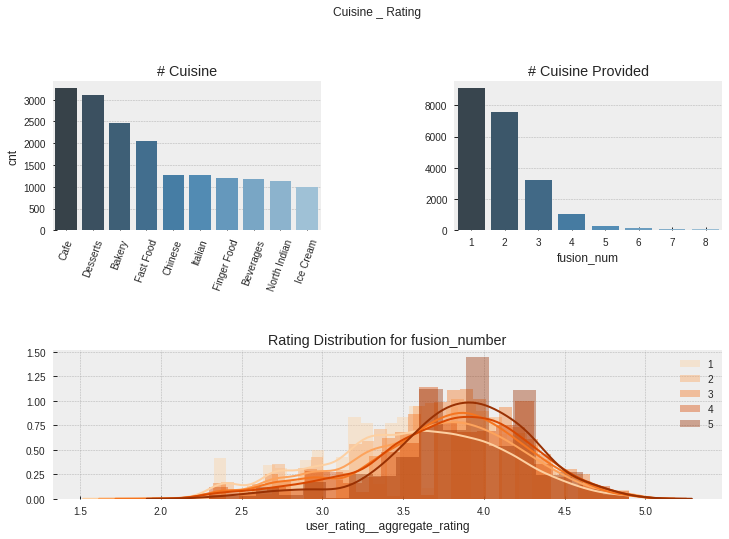

# Unique Cuisine:  245


In [0]:
df['cuisines'] = df['cuisines'].astype(str)
df['fusion_num'] = df['cuisines'].apply(lambda x: len(x.split(',')))

from collections import Counter
lst_cuisine = set()
Cnt_cuisine = Counter()
for cu_lst in df['cuisines']:
    cu_lst = cu_lst.split(',')
    lst_cuisine.update([cu.strip() for cu in cu_lst])
    for cu in cu_lst:
        Cnt_cuisine[cu.strip()] += 1

cnt = pd.DataFrame.from_dict(Cnt_cuisine, orient = 'index')
cnt.sort_values(0, ascending = False, inplace = True)
tmp_cnt = cnt.head(10)
tmp_cnt.rename(columns = {0:'cnt'}, inplace = True)
with plt.style.context('bmh'):
    f = plt.figure(figsize = (12, 8))
    ax = plt.subplot2grid((2,2), (0,0))
    sns.barplot(x = tmp_cnt.index, y = 'cnt', data = tmp_cnt, ax = ax, palette = sns.color_palette('Blues_d', 10))
    ax.set_title('# Cuisine')
    ax.tick_params(axis='x', rotation=70)
    ax = plt.subplot2grid((2,2), (0,1))
    sns.countplot(df['fusion_num'], ax=ax, palette = sns.color_palette('Blues_d', df.fusion_num.nunique()))
    ax.set_title('# Cuisine Provided')
    ax.set_ylabel('')

    ax = plt.subplot2grid((2,2), (1,0), colspan = 2)
    fusion_rate = df[['fusion_num', 'user_rating__aggregate_rating']].copy()
    fusion_rate.loc[fusion_rate['fusion_num'] > 5,'fusion_num'] = 5
    pal = sns.color_palette('Oranges', 11)
    for i in range(1,6):
        num_ix = fusion_rate['fusion_num'] == i
        sns.distplot(fusion_rate.loc[num_ix, 'user_rating__aggregate_rating'], color = pal[i*2], label = str(i), ax = ax)
        ax.legend()
        ax.set_title('Rating Distribution for fusion_number')

    plt.subplots_adjust(wspace = 0.5, hspace = 0.8, top = 0.85)
    plt.suptitle('Cuisine _ Rating')
    plt.show()        
print('# Unique Cuisine: ', len(lst_cuisine))

In [0]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=3)

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [0]:
x=df["location__latitude"][0]
y=df["location__longitude"][0]

In [0]:
def country(lat,lon):
  location=geolocator.reverse('lat,lon', language='en')
  loc = location.raw
  print(loc['address']["country"])
  

# Observations

*   Zomato data set has 39 columns (one ID, one target variable (user_rating__aggregate_rating), 37 features) and 24026 records
*   book_url, medio_Provider, user_rating__rating_tool_tip, zomato_events, user_rating__custom_rating_text,user_rating__custom_rating_text_background, offers has missing values around 98%. Columns can be deleted.
*   include_bogo_offers column has constant value "True" and can be eliminated from analyis.
*   opentable_support, switch_to_order_menu,is_book_form_web_view, has constant values 0 and can be eliminated from analysis.
*   has_online_delivery, is_delivering_now are strongly correlated variables
*   is_table_reservation_supported, has_table_booking are strongly correlated
*   is_zomato_book_res and has_table_booking are correlated.
*   establishment_types__establishment_type__id and establishment_types__establishment_type__name columns are inter-related as id column represents name
*   location_zipcode is dependant on location_locality so it can be removed
*   featured_image, thumb columns are having URLs to logos. These can be deleted as this doesnt add much value to the target variable.
*   location__city column can be retained and location__address, location__locality, location__locality_verbose can be removed.

In [0]:
#Deleting columns based on above observations

df=df.drop(["book_url", "medio_provider", "user_rating__rating_tool_tip", "zomato_events", "user_rating__custom_rating_text","user_rating__custom_rating_text_background","include_bogo_offers", "offers","opentable_support", "switch_to_order_menu","is_book_form_web_view","location__zipcode","featured_image", "thumb","location__address", "location__locality", "location__locality_verbose"],axis=1)